In [2]:
import os

In [4]:
data_dir = './DATASET'

In [5]:
os.listdir(data_dir)

['.DS_Store', 'test', 'train']

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

KeyboardInterrupt: 

In [ ]:
from matplotlib.image import imread

In [18]:
test_path = data_dir+'/test'
train_path = data_dir+'/train'

In [19]:
test_path

'./DATASET/test'

In [20]:
os.listdir(test_path)

['no', 'yes']

In [23]:
os.listdir(train_path + '/yes')[0]

'y1343.jpg'

In [27]:
has_cancer = train_path + '/yes/' + 'y1343.jpg'

In [28]:
has_cancer

'./DATASET/train/yes/y1343.jpg'

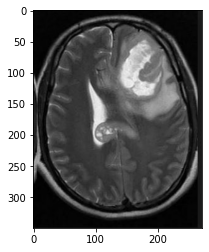

In [31]:
plt.imshow(imread(has_cancer))

In [39]:
no_cancer = train_path + '/no/'+ 'no0.jpg'


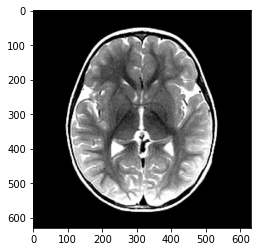

In [40]:
plt.imshow(imread(no_cancer))

In [47]:
len(os.listdir(test_path +'/yes'))

469

In [48]:
len(os.listdir(test_path +'/no'))

86

In [49]:
len(os.listdir(train_path +'/yes'))

1186

In [50]:
len(os.listdir(train_path +'/no'))

1500

In [66]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/no'):
    img = imread(test_path + '/no/' + image_filename)
    d = img.shape
    dim1.append(d[0])
    dim2.append(d[1])

/Users/umberto/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


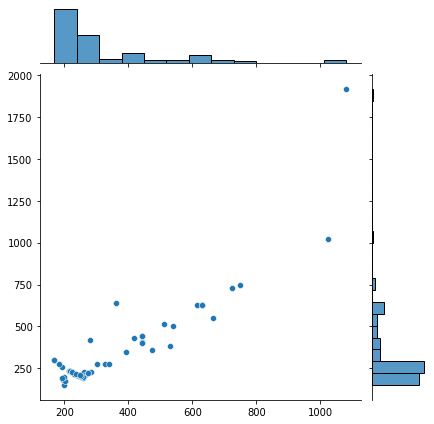

In [68]:
sns.jointplot(dim1, dim2)

In [69]:
np.mean(dim1)

326.98837209302326

In [70]:
np.mean(dim2)

328.72093023255815

In [71]:
image_shape=(326,328,3)

In [72]:
326*328*3

320784

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [78]:
imread(has_cancer).max()

252

In [85]:
image_gen = ImageDataGenerator(rotation_range=20,   
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [90]:
has_cancer = imread(has_cancer)

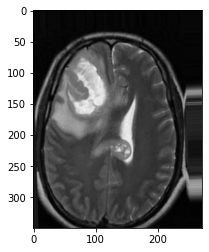

In [91]:
plt.imshow(image_gen.random_transform(has_cancer))

In [92]:
image_gen.flow_from_directory(train_path)

Found 2944 images belonging to 2 classes.


In [93]:
image_gen.flow_from_directory(train_path + '/yes')

Found 258 images belonging to 1 classes.


In [94]:
from tensorflow.keras.models import Sequential

In [97]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [98]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 324, 326, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 162, 163, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 161, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 78, 78, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 97344)            

In [147]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

input_shape=(326,328,3)

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=input_shape))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(1))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('sigmoid'))

#Model Summary
AlexNet.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 82, 82, 96)        34944     
_________________________________________________________________
batch_normalization_72 (Batc (None, 82, 82, 96)        384       
_________________________________________________________________
activation_72 (Activation)   (None, 82, 82, 96)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 41, 41, 96)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 41, 41, 256)       614656    
_________________________________________________________________
batch_normalization_73 (Batc (None, 41, 41, 256)       1024      
_________________________________________________________________
activation_73 (Activation)   (None, 41, 41, 256)     

In [134]:
batch_size = 16

In [135]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary')

Found 2944 images belonging to 2 classes.


In [136]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,shuffle=False,class_mode='binary')

Found 555 images belonging to 2 classes.


In [148]:
AlexNet.compile(loss = keras.losses.binary_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [149]:
results = AlexNet.fit(train_image_gen, epochs=20, validation_data=test_image_gen)

Epoch 1/20
184/184 [==============================] - 286s 2s/step - loss: 0.5915 - accuracy: 0.6916 - val_loss: 1.6599 - val_accuracy: 0.8450
Epoch 2/20
184/184 [==============================] - 294s 2s/step - loss: 0.5032 - accuracy: 0.7525 - val_loss: 0.2527 - val_accuracy: 0.9081
Epoch 3/20
184/184 [==============================] - 299s 2s/step - loss: 0.4525 - accuracy: 0.8096 - val_loss: 0.1820 - val_accuracy: 0.9297
Epoch 4/20
184/184 [==============================] - 292s 2s/step - loss: 0.4013 - accuracy: 0.8473 - val_loss: 0.3200 - val_accuracy: 0.8919
Epoch 5/20
184/184 [==============================] - 308s 2s/step - loss: 0.3742 - accuracy: 0.8537 - val_loss: 0.3770 - val_accuracy: 0.8757
Epoch 6/20
184/184 [==============================] - 328s 2s/step - loss: 0.3575 - accuracy: 0.8619 - val_loss: 0.4206 - val_accuracy: 0.8090
Epoch 7/20
184/184 [==============================] - 304s 2s/step - loss: 0.3384 - accuracy: 0.8719 - val_loss: 0.2129 - val_accuracy: 0.9207

In [151]:
results.save()

AttributeError: 'History' object has no attribute 'save'

In [153]:
AlexNet.save('alexnet-model.h5')

In [154]:
results.history

{'loss': [0.5661863684654236,
  0.5009593963623047,
  0.4504397511482239,
  0.4031929671764374,
  0.37380483746528625,
  0.34006020426750183,
  0.3295244872570038,
  0.3013071119785309,
  0.27856776118278503,
  0.28379327058792114,
  0.24755144119262695,
  0.24398300051689148,
  0.22730854153633118,
  0.21858544647693634,
  0.21910281479358673,
  0.18607039749622345,
  0.18665625154972076,
  0.1737411916255951,
  0.17531263828277588,
  0.17757795751094818],
 'accuracy': [0.7116168737411499,
  0.7629076242446899,
  0.8101223111152649,
  0.8383151888847351,
  0.85495924949646,
  0.873641312122345,
  0.8760190010070801,
  0.8960598111152649,
  0.90455162525177,
  0.9021739363670349,
  0.9133831262588501,
  0.91745924949646,
  0.9239130616188049,
  0.9225543737411499,
  0.9228940010070801,
  0.9395380616188049,
  0.937160313129425,
  0.946671187877655,
  0.9398776888847351,
  0.9446331262588501],
 'val_loss': [1.6598762273788452,
  0.2526604235172272,
  0.1819620579481125,
  0.320047080516